# Global links

In [1]:
import sys
import os
import pandas as pd
import networkx as nx

# Get the parent directory of your current directory
parent_dir = os.path.dirname(os.getcwd())

# Add the parent directory to the sys.path
sys.path.append(parent_dir)

# Now you can import your module as usual
from SimulationRL import *
import SimulationRL

populationMap   = '../Population Map/gpw_v4_population_count_rev11_2020_15_min.tif'
outputPath      = './GlobalLinks/'
inputPath       = '../'
matching        = 'Greedy' # ['Markovian', 'Greedy']

No GPU available


In [2]:
inputParams = pd.read_csv(inputPath + "inputRL.csv")

locations = inputParams['Locations'].copy()
print('Nº of Gateways: ' + str(len(locations)))


env = simpy.Environment()
earth, _, _, _ = initialize(env, populationMap, inputPath + 'Gateways.csv', rKM, inputParams, movementTime, locations, outputPath, matching=matching)
G = earth.gateways[0].graph

Nº of Gateways: 18
Using Kepler constellation design
total divisions in x = 1440
 total divisions in y = 720
 total cells = 1036800
 window of operation (longitudes) = (0, 1440)
 window of operation (latitudes) = (0, 720)

Finding cells within coverage area of GT 18 of 18
Time taken to find cells that are within range of all GTs: 3.5713579654693604 seconds
Time taken to add cell information to all GTs: 0.07240700721740723 seconds

Matching: Greedy
----------------------------------
Removing duplicated links...
0_1 east satellite duplicated: 6_19, 1_1
Keeping most horizontal link: 1_1
0_1 east satellite duplicated: 1_1, 3_0
Keeping most horizontal link: 1_1
0_2 West satellite duplicated: 6_17, 6_18
Keeping most horizontal link: 6_18
0_2 east satellite duplicated: 1_2, 6_19
Keeping most horizontal link: 1_2
0_3 West satellite duplicated: 6_16, 6_17
Keeping most horizontal link: 6_17
0_7 east satellite duplicated: 1_6, 1_7
Keeping most horizontal link: 1_7
0_8 east satellite duplicated: 1

In [17]:
# class BlocksForPickle:
#     def __init__(self, block):
#         self.size = 64800  # size in bits
#         self.ID = block.ID  # a string which holds the source id, destination id, and index of the block, e.g. "1_2_12"
#         self.timeAtFull = block.timeAtFull  # the simulation time at which the block was full and was ready to be sent.
#         self.creationTime = block.creationTime  # the simulation time at which the block was created.
#         self.timeAtFirstTransmission = block.timeAtFirstTransmission  # the simulation time at which the block left the GT.
#         self.checkPoints = block.checkPoints  # list of simulation reception times at node with the first entry being the reception time at first sat - can be expanded to include the sat IDs at each checkpoint
#         self.checkPointsSend = block.checkPointsSend  # list of times after the block was sent at each node
#         self.path = block.path
#         self.queueLatency = block.queueLatency  # total time acumulated in the queues
#         self.txLatency = block.txLatency  # total transmission time
#         self.propLatency = block.propLatency  # total propagation latency
#         self.totLatency = block.totLatency  # total latency
#         self.QPath = block.QPath

blocks_path = '../Results/Congestion_Test/Deep Q-Learning 2.0/blocks_2.npy'
paths = np.load(blocks_path, allow_pickle=True)


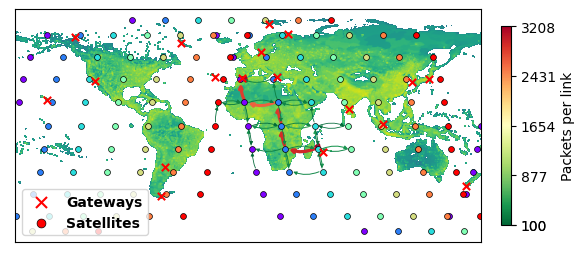

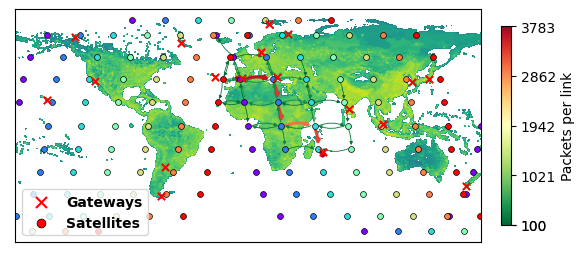

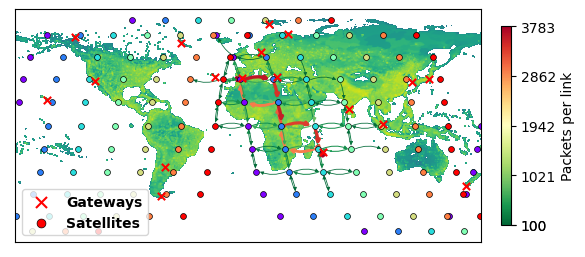

In [18]:
# for block in paths:
#     print(block.QPath)

def plotCongestionMap(self, paths, outputPath):
    def extract_gateways(path):
        # Assuming QPath's first and last elements contain gateway identifiers
        return path.QPath[0][0], path.QPath[-1][0]

    # Identify unique routes and filter by packet threshold (e.g., 500 packets)
    unique_routes = {}
    for block in paths:
        if block.QPath:  # Ensure QPath is not empty
            gateways = extract_gateways(block)
            if gateways in unique_routes:
                unique_routes[gateways] += 1
            else:
                unique_routes[gateways] = 1

    filtered_routes = {route: count for route, count in unique_routes.items() if count > 500}

    # Plot for each unique route above the threshold
    for route, count in filtered_routes.items():
        route_paths = [block for block in paths if extract_gateways(block) == route and block.QPath]
        self.plotMap(plotGT=True, plotSat=True, edges=False, save=True, paths=np.asarray(route_paths),
                     fileName=os.path.join(outputPath, f"CongestionMap_{route[0]}_to_{route[1]}.png"))

    # Plot for all routes combined
    all_routes_paths = [block for block in paths if block.QPath and extract_gateways(block) in filtered_routes]
    self.plotMap(plotGT=True, plotSat=True, edges=False, save=True, paths=np.asarray(all_routes_paths),
                 fileName=os.path.join(outputPath, "CongestionMap_all_routes.png"))


plotCongestionMap(earth, paths, './')


In [5]:
# earth.plotMap(plotGT = True, plotSat = False, edges=False, save = True)

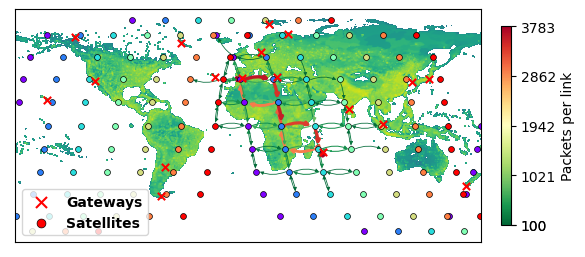

In [6]:
earth.plotMap(plotGT = True, plotSat = True, edges=False, save = True, paths=paths, fileName='CongestionMap.png')

In [7]:
w 3

SyntaxError: invalid syntax (3500110521.py, line 1)

In [ ]:
path = getShortestPath('Mauritius', 'Jeju, South Korea', 'slant_range', G)
for hop in path:
    print(hop)

['Mauritius', 57.57, -20.27]
['2_6', 54.2102127361579, -17.790806481339935]
['2_5', 51.42857142857143, 3.4689080464391092e-15]
['2_4', 48.64693012098495, 17.790806481339942]
['2_3', 45.228060530468454, 35.533328282969194]
['3_3', 70.94234624475416, 35.533328282969194]
['4_3', 96.65663195903988, 35.533328282969194]
['5_3', 122.3709176733256, 35.533328282969194]
['Jeju, South Korea', 126.53, 33.38]


In [ ]:
import networkx as nx

# Assume G is your graph and is already created and populated with edges and 'slant_range' as edge attribute

# Find shortest path
path = nx.shortest_path(G, 'Mauritius', 'Jeju, South Korea', weight='slant_range')

# Initialize total cost
total_cost = 0

print("Shortest path and costs:")
for i in range(len(path) - 1):
    # Get nodes
    node1, node2 = path[i], path[i + 1]
    
    # Get the cost of the edge between node1 and node2
    cost = G[node1][node2]['slant_range']
    
    # Add to total cost
    total_cost += cost
    
    # Print edge and cost
    print(f"Edge from {node1} to {node2} has a cost of {cost/1000:.2F}km")

# Print total cost
print(f"Total cost from Mauritius to Jeju, South Korea: {total_cost/1000:.2F}")

# resulta que hay tres enlaces con una distancia que parece que no es correcta
# evidentemente hay un error con la distancia calculada en el intra-plane
# a parte es raro de cojones que el hop no llegue ninguno y todos stuck


Shortest path and costs:
Edge from Mauritius to 2_6 has a cost of 761.56km
Edge from 2_6 to 2_5 has a cost of 2183.20km
Edge from 2_5 to 2_4 has a cost of 2183.20km
Edge from 2_4 to 2_3 has a cost of 2183.20km
Edge from 2_3 to 3_3 has a cost of 2527.19km
Edge from 3_3 to 4_3 has a cost of 2527.19km
Edge from 4_3 to 5_3 has a cost of 2527.19km
Edge from 5_3 to Jeju, South Korea has a cost of 762.98km
Total cost from Mauritius to Jeju, South Korea: 15655.70


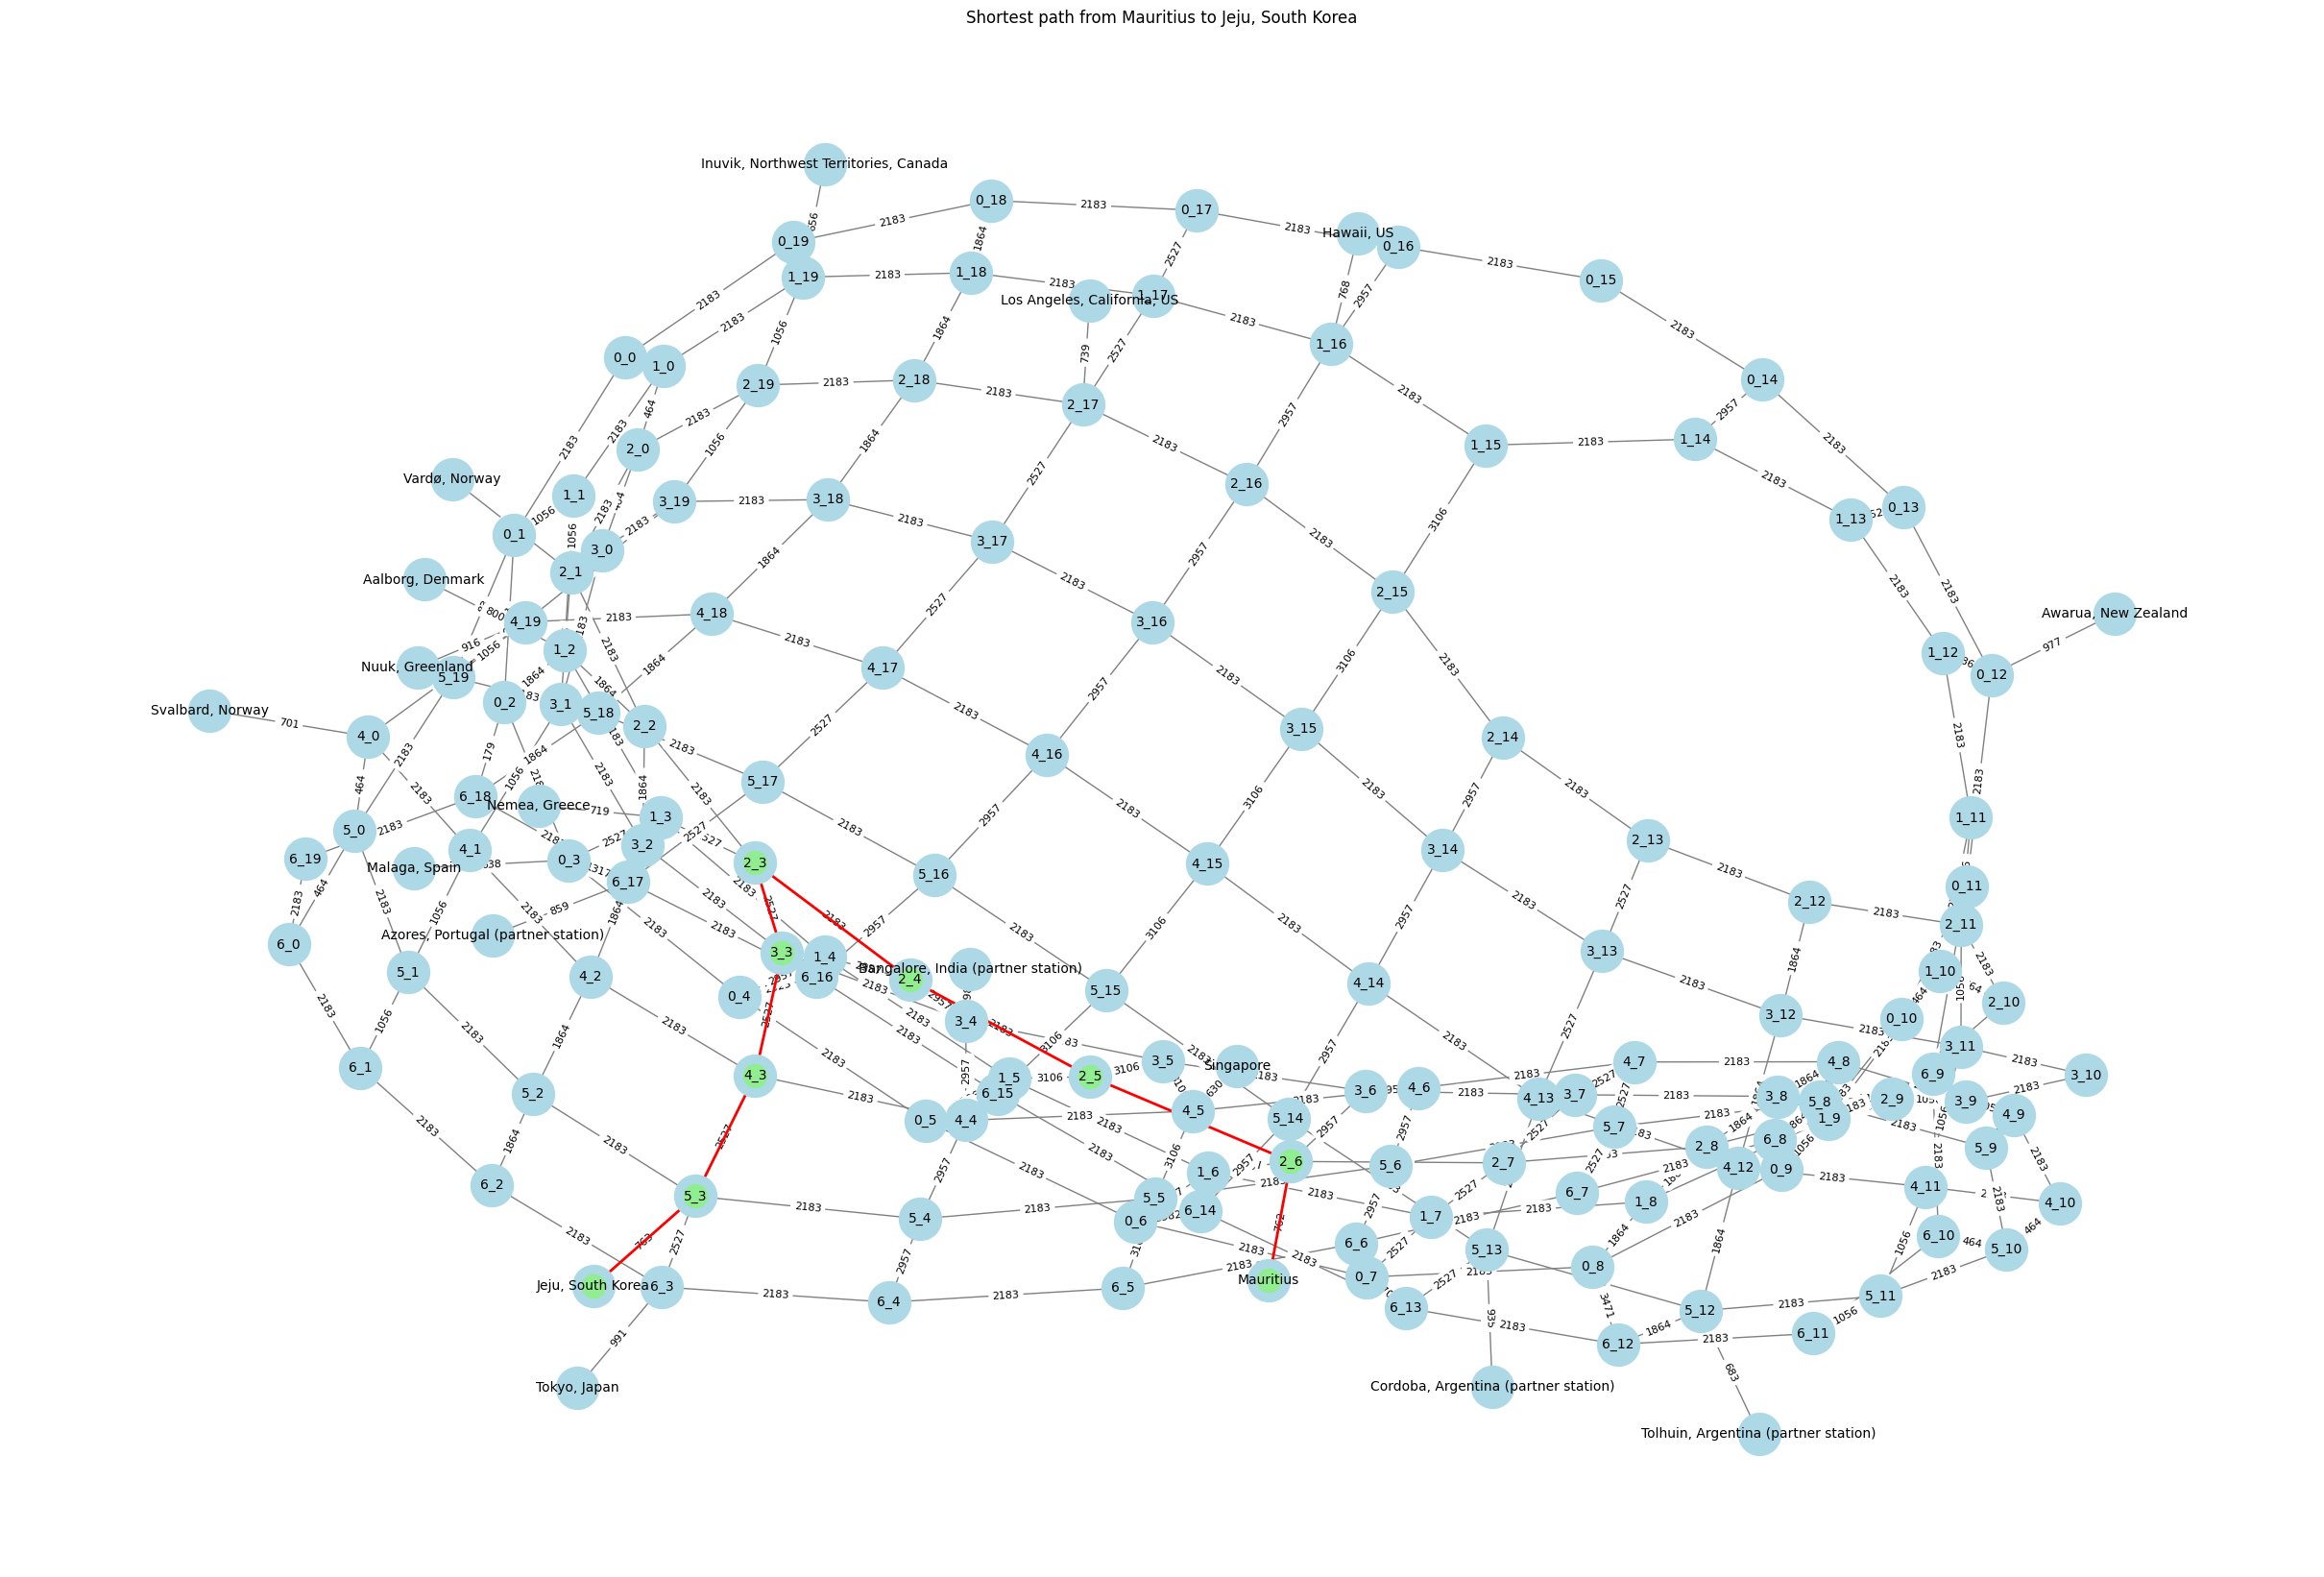

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_directed_graph(G, source, target, weight='slant_range'):
    plt.figure(figsize=(24, 16))  # Adjust figure size as needed

    # Calculate positions for the nodes
    pos = nx.spring_layout(G, scale=2)

    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1000, font_size=10)

    # Draw edge labels (weights divided by 1000 and formatted)
    edge_labels = {(u, v): f"{d['slant_range']/1000:.0f}" for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    # Highlight the shortest path
    path = nx.shortest_path(G, source, target, weight=weight)
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='lightgreen')
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)

    plt.title(f"Shortest path from {source} to {target}")
    plt.show()

# Example usage
plot_directed_graph(G, 'Mauritius', 'Jeju, South Korea')


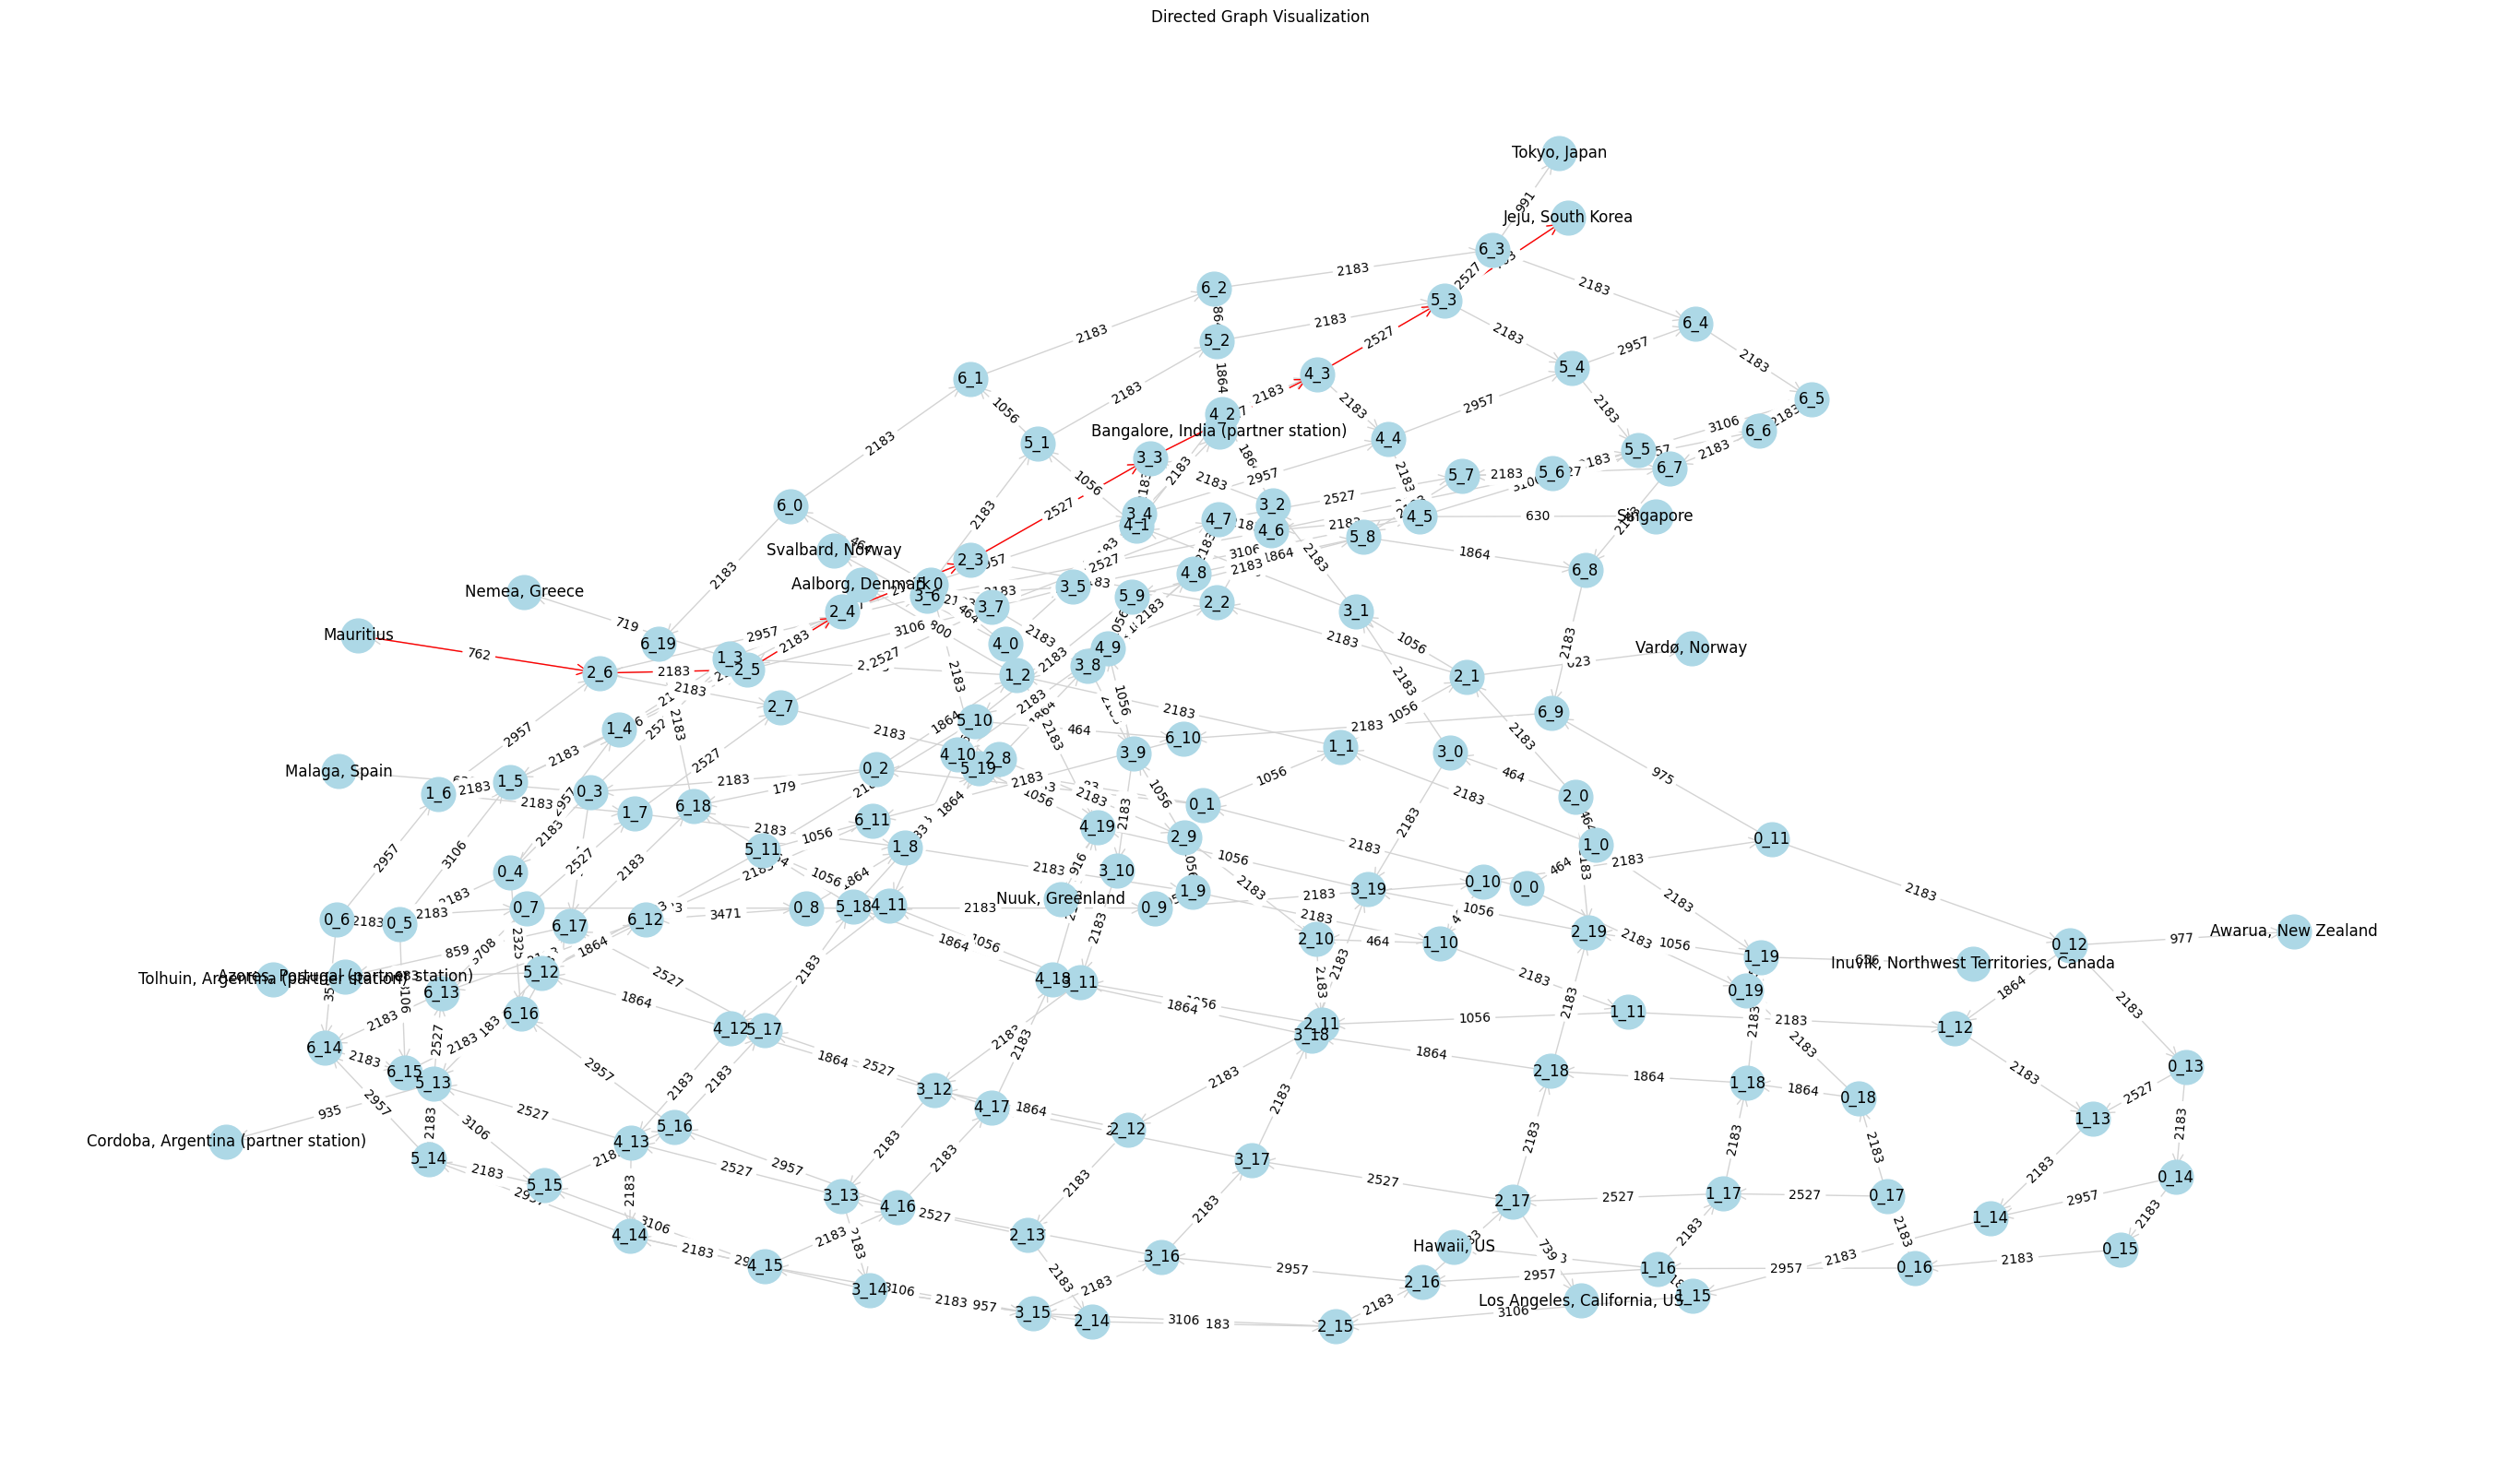

In [ ]:
def plot_directed_graph(G, path=None):
    """
    Plots a directed graph with nodes and edges, highlighting a shortest path if provided,
    and annotates edges with weights divided by 1000 and rounded to 2 decimal places.

    Args:
    G (networkx.DiGraph): A directed graph.
    path (list): A list of nodes representing the shortest path to be highlighted.
    """
    plt.figure(figsize=(35, 20))  # Larger figure size

    pos = nx.spring_layout(G, scale=2)  # Adjust scale to spread out the nodes

    # Draw all nodes
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')

    # Draw all edges in light grey
    nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='->', arrowsize=20, edge_color='lightgrey')

    # If a path is provided, draw it differently
    if path:
        # Extract edges from the path
        path_edges = list(zip(path, path[1:]))
        # Highlight path edges
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, arrows=True, arrowstyle='->', arrowsize=20, edge_color='red')

    # Draw edge labels with weights divided by 1000 and rounded to 2 decimals
    edge_labels = {(u, v): f"{d['slant_range']/1000:.0f}" for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Draw the labels
    nx.draw_networkx_labels(G, pos)

    plt.title("Directed Graph Visualization")
    plt.axis('off')  # Turn off the axis
    plt.show()

plot_directed_graph(G, path)


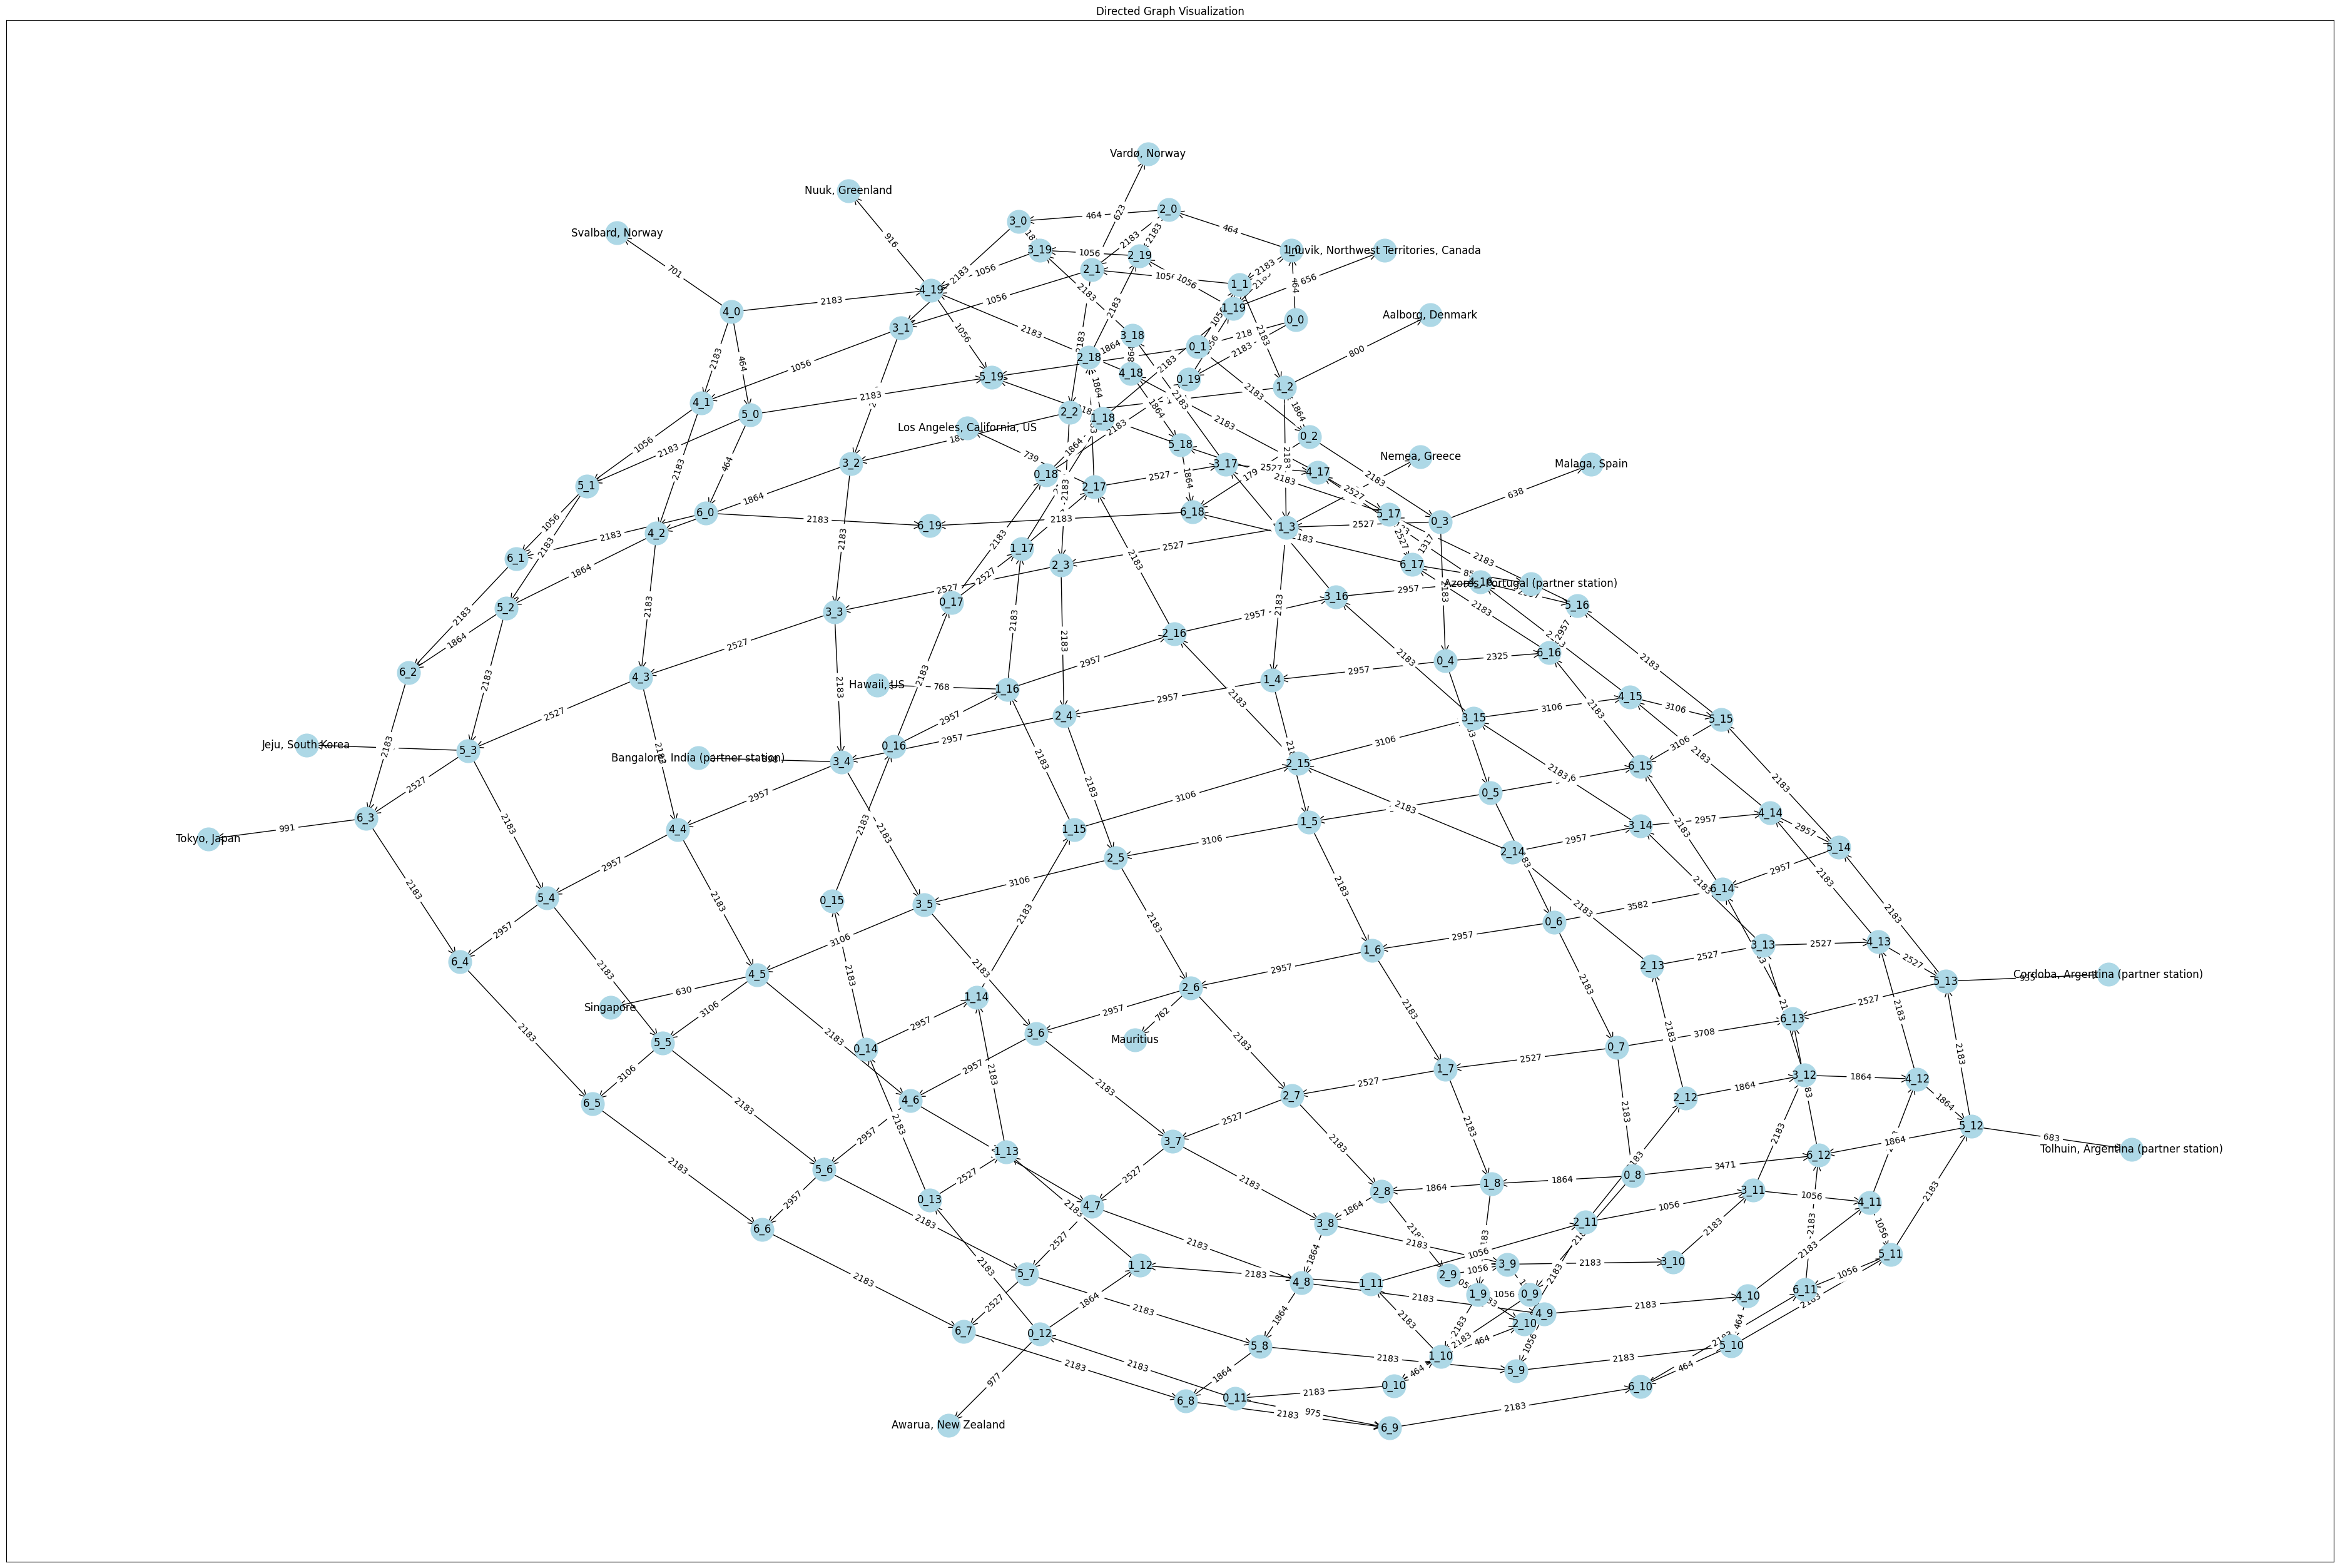

In [ ]:
def plot_directed_graph(G):
    plt.figure(figsize=(48, 32))  # Larger figure size

    pos = nx.spring_layout(G, scale=5)  # Increase the scale to spread out the nodes

    # Draw the nodes
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')

    # Draw the edges with visible arrows
    edges = nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='->', arrowsize=20, edge_color='black')

    # Draw the labels
    nx.draw_networkx_labels(G, pos)

    # Extract and format edge weights
    edge_weights = dict([((u, v,), f"{d['slant_range']/1000:.0f}") for u, v, d in G.edges(data=True)])
    
    # Draw edge labels with formatted weights
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights)

    plt.title("Directed Graph Visualization")
    plt.show()


plot_directed_graph(G)

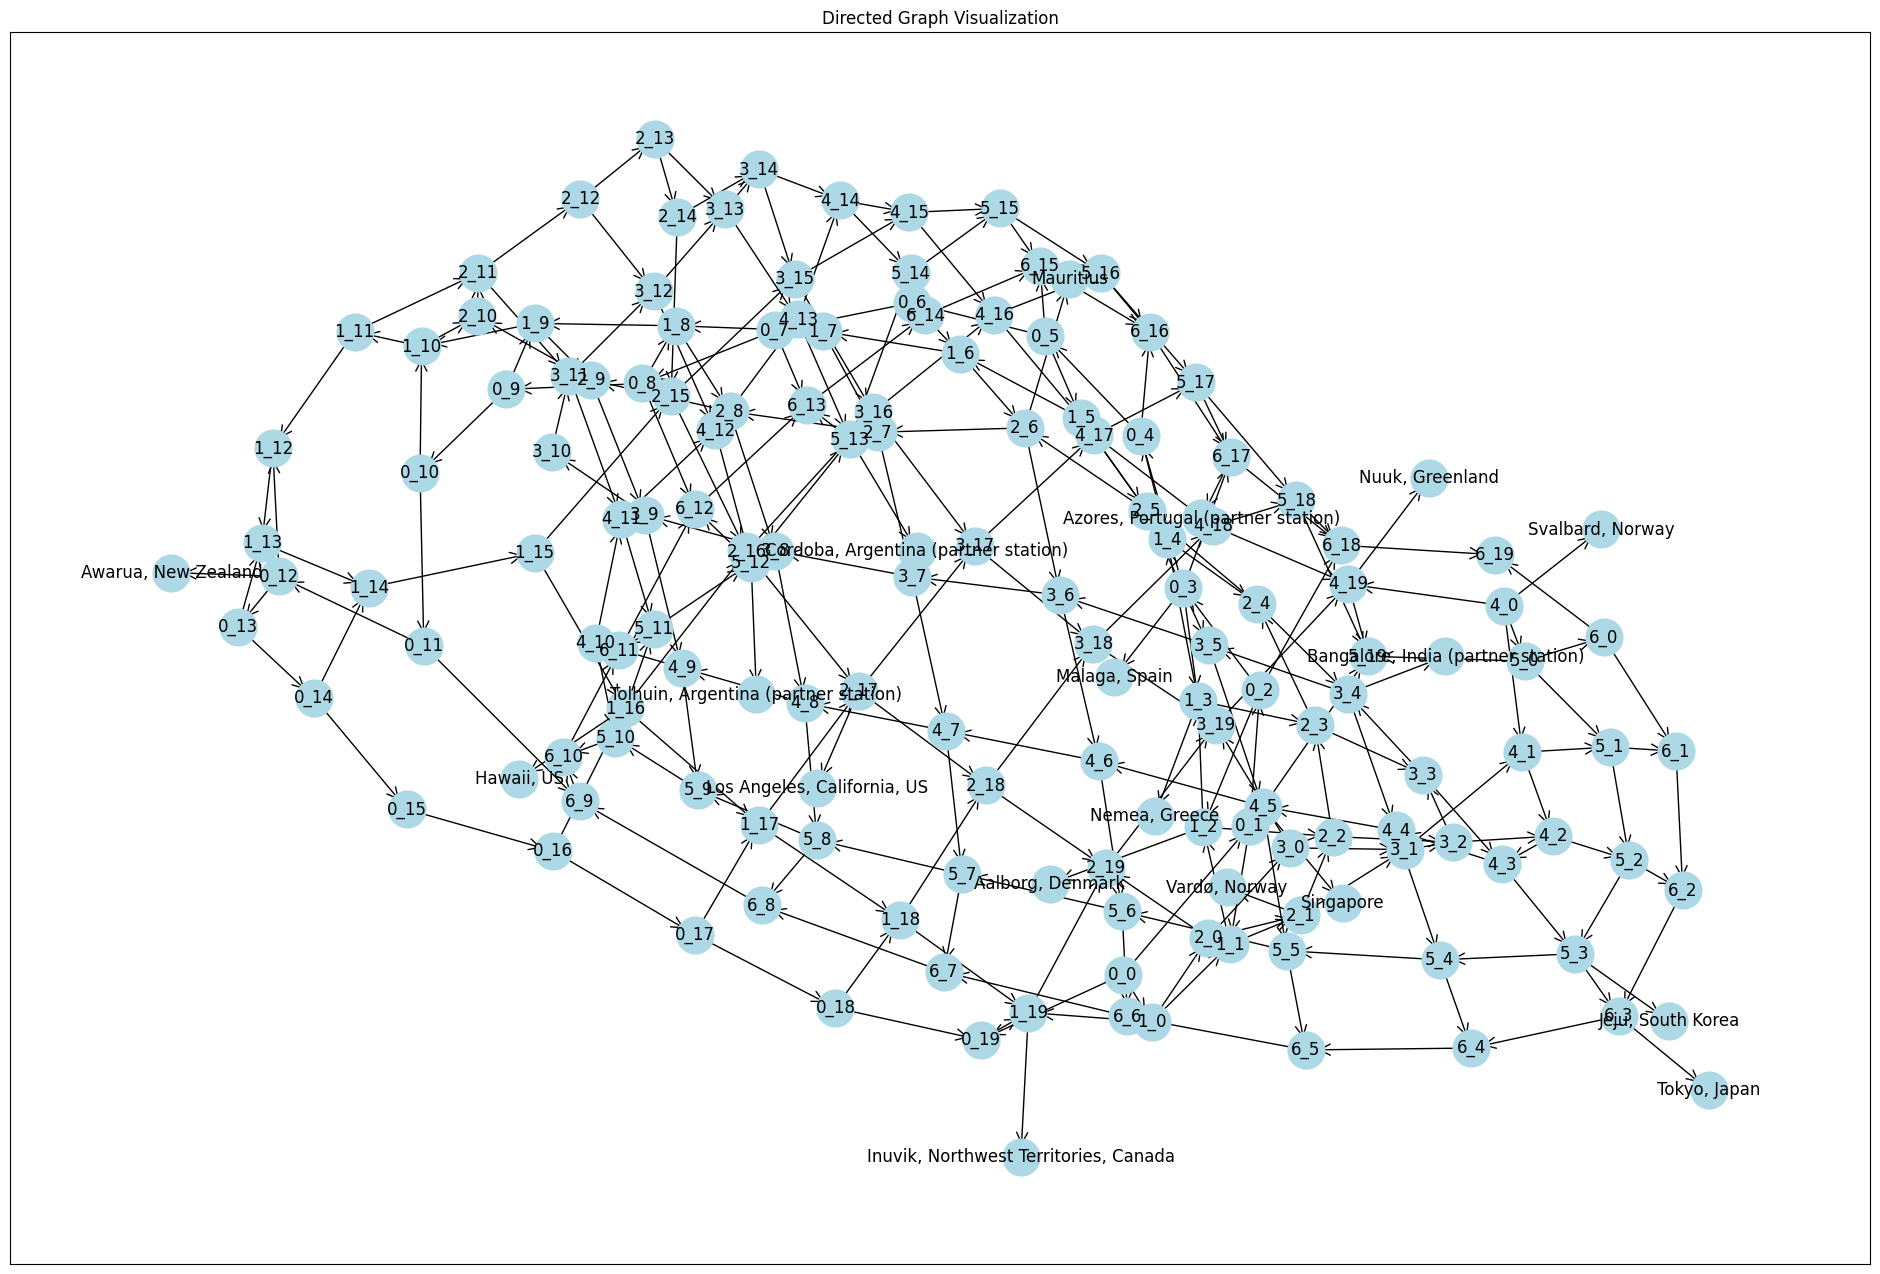

In [ ]:
def plot_directed_graph(G):
    """
    Plots a directed graph with nodes and edges, with adjustments to 'zoom out' the graph.

    Args:
    G (networkx.DiGraph): A directed graph.
    """
    plt.figure(figsize=(24, 16))  # Larger figure size

    pos = nx.spring_layout(G, scale=5)  # Increase the scale to spread out the nodes

    # Draw the nodes
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')

    # Draw the edges with visible arrows
    nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='->', arrowsize=20, edge_color='black')

    # Draw the labels
    nx.draw_networkx_labels(G, pos)

    plt.title("Directed Graph Visualization")
    plt.show()

plot_directed_graph(G)

In [ ]:
# Save edges into a txt
print(G)

# Print all edges
# print("\nEdges:")
with open(outputPath + 'edges.txt', 'w') as f:
    for edge in G.edges():
        f.write(str(edge)+'\n')

Graph with 158 nodes and 277 edges


In [ ]:
def deleteDuplicatedLinks(satA, g, earth):
    '''
    Given a satellite, searches for its east and west neighbour. If the east or west link is duplicated,
    it will remove the link with a higher latitude difference, keeping the horizontal links
    '''

    def getMostHorizontal(currentSat, satA, satB):
        '''
        Chooses the dat with the closest latitude to currentSat
        '''
        return (satA, satB) if abs(satA.latitude-currentSat.latitude)<abs(satB.latitude-currentSat.latitude) else (satB, satA)

    linkedSats = {'U':None, 'D':None, 'R':None, 'L':None}
    for edge in list(g.edges(satA.ID)):
        if edge[1][0].isdigit():
            satB = findByID(earth, edge[1])
            dir = getDirection(satA, satB)

            if(dir == 3):                                         # Found Satellite at East
                if linkedSats['R'] is not None:
                    print(f"{satA.ID} east satellite duplicated: {linkedSats['R'].ID}, {satB.ID}")
                    most_horizontal, less_horizontal = getMostHorizontal(satA, linkedSats['R'], satB)
                    print(f'Keeping most horizontal link: {most_horizontal.ID}')
                    linkedSats['R']  = most_horizontal
                    # remove pair from G
                    G.remove_edge(satA.ID, less_horizontal.ID)
                else:
                    linkedSats['R']  = satB

            elif(dir == 4):                                         # Found Satellite at West
                if linkedSats['L'] is not None:
                    print(f"{satA.ID} West satellite duplicated: {linkedSats['L'].ID}, {satB.ID}")
                    most_horizontal, less_horizontal = getMostHorizontal(satA, linkedSats['L'], satB)
                    print(f'Keeping most horizontal link: {most_horizontal.ID}')
                    linkedSats['L']  = most_horizontal
                    # remove pair from G
                    G.remove_edge(satA.ID, less_horizontal.ID)
                else:
                    linkedSats['L']  = satB
